<a href="https://colab.research.google.com/github/rakha05/R/blob/main/Salinan_dari_ujidata_fix_(1)_(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
   import numpy as np
   import pandas as pd

   from sklearn.preprocessing import LabelEncoder
   from sklearn.model_selection import train_test_split
   from sklearn.preprocessing import StandardScaler
   from sklearn.naive_bayes import GaussianNB
   from sklearn.metrics import confusion_matrix
   from sklearn.metrics import classification_report
   from sklearn.metrics import accuracy_score

In [ ]:
     dataset=pd.read_excel('/content/Data Set MPL ID s10 (1).xlsx')
     dataset.head()

,Hero,Hero_picked,T_wins,T_lose,T_winrate,T_pickpercentage,Bs_picked,Bs_won,Bs_lost,Bs_winrate,Rs_picked,Rs_won,Rs_lost,Rs_winrate,Hero_banned,Ban_percentage,Pick&Ban,Pick&Ban percentage
0,Paquito,124,61,63,49.19%,72.09,59,28,31,47.46%,65,33,32,50.77%,32,18.60,156,90.70
1,Esmeralda,108,52,56,48.15%,62.79,58,29,29,50.00%,50,23,27,46.00%,33,19.19,141,81.98
2,Claude,79,39,40,49.37%,45.93,42,21,21,50.00%,37,18,19,48.65%,36,20.93,115,66.86
3,Beatrix,78,51,27,65.38%,45.35,39,21,18,53.85%,39,30,9,76.92%,45,26.16,123,71.51
4,Valentina,64,31,33,48.44%,37.21,38,17,21,44.74%,26,14,12,53.85%,106,61.63,170,98.84


<ipython-input-32-e584a9582b3e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Winning_Flag', y='Hero', inner='stick', palette='Dark2')


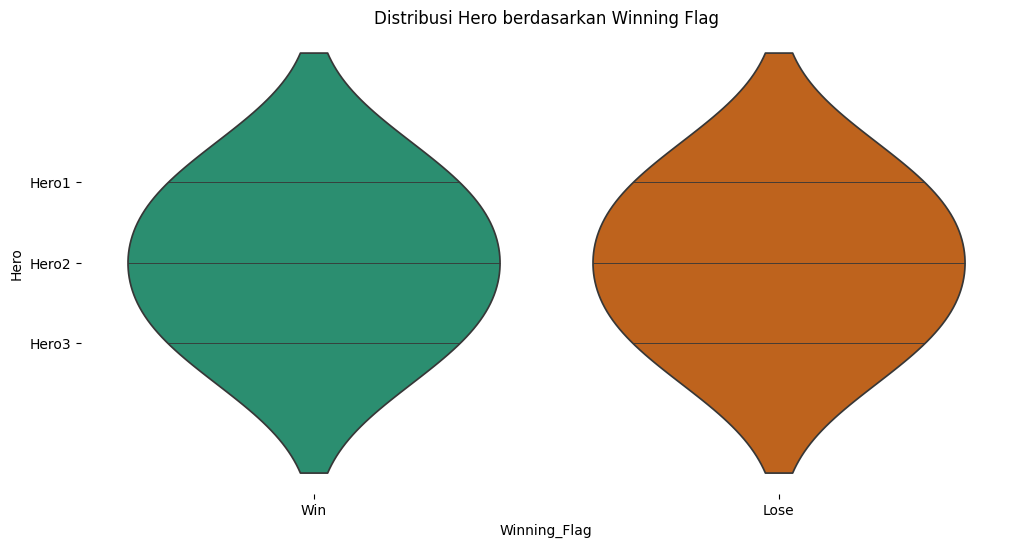

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Contoh DataFrame
data = {
    'Hero': ['Hero1', 'Hero2', 'Hero3', 'Hero1', 'Hero2', 'Hero3'],
    'Winning_Flag': ['Win', 'Lose', 'Win', 'Lose', 'Win', 'Lose']
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Winning_Flag', y='Hero', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title("Distribusi Hero berdasarkan Winning Flag")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hero                 78 non-null     int64  
 1   Hero_picked          78 non-null     int64  
 2   T_wins               78 non-null     int64  
 3   T_lose               78 non-null     int64  
 4   T_winrate            78 non-null     object 
 5   T_pickpercentage     78 non-null     float64
 6   Bs_picked            78 non-null     int64  
 7   Bs_won               78 non-null     int64  
 8   Bs_lost              78 non-null     int64  
 9   Bs_winrate           78 non-null     object 
 10  Rs_picked            78 non-null     int64  
 11  Rs_won               78 non-null     int64  
 12  Rs_lost              78 non-null     int64  
 13  Rs_winrate           78 non-null     object 
 14  Hero_banned          78 non-null     int64  
 15  Ban_percentage       78 non-null     float

In [ ]:
dataset.empty

False

In [ ]:
from sklearn.preprocessing import LabelEncoder # Assuming LabelEncoder was intended
en = LabelEncoder()

dataset['Hero'] = en.fit_transform(dataset['Hero']) # Remove extra space(s)/tab(s) before this line
dataset.head()

,Hero,Hero_picked,T_wins,T_lose,T_winrate,T_pickpercentage,Bs_picked,Bs_won,Bs_lost,Bs_winrate,Rs_picked,Rs_won,Rs_lost,Rs_winrate,Hero_banned,Ban_percentage,Pick&Ban,Pick&Ban percentage
0,60,124,61,63,49.19%,72.09,59,28,31,47.46%,65,33,32,50.77%,32,18.60,156,90.70
1,19,108,52,56,48.15%,62.79,58,29,29,50.00%,50,23,27,46.00%,33,19.19,141,81.98
2,14,79,39,40,49.37%,45.93,42,21,21,50.00%,37,18,19,48.65%,36,20.93,115,66.86
3,7,78,51,27,65.38%,45.35,39,21,18,53.85%,39,30,9,76.92%,45,26.16,123,71.51
4,70,64,31,33,48.44%,37.21,38,17,21,44.74%,26,14,12,53.85%,106,61.63,170,98.84


In [ ]:
   x = dataset.iloc[:,:-1].values
   y = dataset.iloc[:, -1].values

In [ ]:
  x

array([[60, 124, 61, ..., 32, 18.6, 156],
       [19, 108, 52, ..., 33, 19.19, 141],
       [14, 79, 39, ..., 36, 20.93, 115],
       ...,
       [44, 0, 0, ..., 1, 0.58, 1],
       [66, 0, 0, ..., 1, 0.58, 1],
       [77, 0, 0, ..., 1, 0.58, 1]], dtype=object)

In [ ]:
  y

array([90.7 , 81.98, 66.86, 71.51, 98.84, 63.37, 48.26, 44.77, 39.53,
       66.28, 97.09, 55.81, 99.42, 94.77, 48.84, 34.88, 58.14, 23.26,
       22.67, 45.35, 25.58, 23.26, 31.98, 25.58, 24.42, 26.16, 19.19,
       20.93, 91.28, 22.09, 42.44, 29.65, 22.09, 33.72, 30.81, 25.58,
       45.93, 15.12, 34.3 ,  8.14,  9.88, 10.47, 15.7 ,  6.98, 11.63,
        6.98,  6.98,  9.88,  7.56,  4.65,  4.65,  4.65,  4.07,  4.65,
        6.98,  4.07,  2.91,  5.23,  1.74,  2.91,  1.16,  4.07,  1.74,
        0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  1.16,
        0.58,  0.58,  0.58,  0.58,  0.58,  0.58])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print("x_train=", len(x_train))
print("x_test=", len(x_test))
print("y_train=", len(y_train))
print("y_test=", len(y_test))


x_train= 62
x_test= 16
y_train= 62
y_test= 16


In [ ]:
def clean_percentage_column(df, column_name):
    # Check if the column exists and is of object/string type
    if column_name in df.columns and df[column_name].dtype == 'object':
        print(f"Cleaning column: {column_name}")
        # Remove '%' and convert to float, handle potential errors
        df[column_name] = df[column_name].astype(str).str.replace('%', '', regex=False)
        # Convert to numeric, coercing errors to NaN, then fill NaN (e.g., with 0 or mean)
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
        # Example: Fill NaN values with 0. You might choose a different strategy.
        df[column_name].fillna(0, inplace=True)
        print(f"Column {column_name} cleaned and converted to numeric.")
    elif column_name not in df.columns:
        print(f"Warning: Column '{column_name}' not found in the dataset.")
    else:
        print(f"Column {column_name} is already numeric or not of object/string type. No cleaning applied.")


In [ ]:
  x_train

array([[30, 1, 0, ..., 1, 0.58, 2],
       [15, 11, 4, ..., 1, 0.58, 12],
       [68, 6, 0, ..., 2, 1.16, 8],
       ...,
       [27, 3, 2, ..., 6, 3.49, 9],
       [47, 31, 16, ..., 9, 5.23, 40],
       [57, 1, 1, ..., 0, 0.0, 1]], dtype=object)

In [ ]:
  x_test

array([[2, 5, 1, 4, '20.00%', 2.91, 2, 1, 1, '50.00%', 3, 0, 3, '0.00%',
        3, 1.74, 8],
       [45, 1, 1, 0, '100.00%', 0.58, 1, 1, 0, '100.00%', 0, 0, 0, '-',
        0, 0.0, 1],
       [28, 1, 0, 1, '0.00%', 0.58, 1, 0, 1, '0.00%', 0, 0, 0, '-', 0,
        0.0, 1],
       [70, 64, 31, 33, '48.44%', 37.21, 38, 17, 21, '44.74%', 26, 14,
        12, '53.85%', 106, 61.63, 170],
       [18, 2, 2, 0, '100.00%', 1.16, 1, 1, 0, '100.00%', 1, 1, 0,
        '100.00%', 0, 0.0, 2],
       [53, 27, 12, 15, '44.44%', 15.7, 16, 6, 10, '37.50%', 11, 6, 5,
        '54.55%', 17, 9.88, 44],
       [37, 25, 14, 11, '56.00%', 14.53, 15, 7, 8, '46.67%', 10, 7, 3,
        '70.00%', 13, 7.56, 38],
       [20, 2, 2, 0, '100.00%', 1.16, 2, 2, 0, '100.00%', 0, 0, 0, '-',
        5, 2.91, 7],
       [49, 53, 31, 22, '58.49%', 30.81, 25, 14, 11, '56.00%', 28, 17,
        11, '60.71%', 15, 8.72, 68],
       [44, 0, 0, 0, '-', 0.0, 0, 0, 0, '-', 0, 0, 0, '-', 1, 0.58, 1],
       [34, 50, 26, 24, '52.00%', 29

In [ ]:
  y_train

array([ 1.16,  6.98,  4.65, 81.98, 15.12,  6.98,  1.74, 29.65, 48.84,
        0.58, 58.14, 19.19, 45.35,  0.58, 48.26,  1.74,  4.65,  0.58,
       34.88, 22.67, 94.77, 31.98, 97.09,  2.91, 55.81, 90.7 , 63.37,
       15.7 , 71.51,  9.88, 99.42,  6.98, 30.81, 20.93, 42.44, 23.26,
       33.72, 34.3 ,  4.07, 91.28, 25.58, 10.47, 44.77,  7.56,  2.91,
        0.58, 25.58,  0.58,  8.14, 66.86,  4.07,  4.65,  0.58, 45.93,
       26.16,  6.98, 22.09,  0.58,  9.88,  5.23, 23.26,  0.58])

In [ ]:
  y_test

array([ 4.65,  0.58,  0.58, 98.84,  1.16, 25.58, 22.09,  4.07, 39.53,
        0.58, 66.28,  0.58, 11.63, 24.42,  0.58,  0.58])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder # Ensure LabelEncoder is imported
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported

In [126]:
 from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Memuat dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Menggunakan hanya dua kelas untuk klasifikasi biner
X = X[y != 2]
y = y[y != 2]

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Melatih model SVC dengan probabilitas diaktifkan
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train, y_train)

# Mendapatkan estimasi probabilitas untuk set pengujian
probabilities = svc.predict_proba(X_test)

# Menampilkan estimasi probabilitas
for i, prob in enumerate(probabilities):
    print(f"Sampel {i+1}: Probabilitas Kelas 0 = {prob[0]:.4f}, Probabilitas Kelas 1 = {prob[1]:.4f}")


Sampel 1: Probabilitas Kelas 0 = 0.0000, Probabilitas Kelas 1 = 1.0000
Sampel 2: Probabilitas Kelas 0 = 0.0148, Probabilitas Kelas 1 = 0.9852
Sampel 3: Probabilitas Kelas 0 = 0.0042, Probabilitas Kelas 1 = 0.9958
Sampel 4: Probabilitas Kelas 0 = 0.9589, Probabilitas Kelas 1 = 0.0411
Sampel 5: Probabilitas Kelas 0 = 0.9644, Probabilitas Kelas 1 = 0.0356
Sampel 6: Probabilitas Kelas 0 = 0.9759, Probabilitas Kelas 1 = 0.0241
Sampel 7: Probabilitas Kelas 0 = 0.9933, Probabilitas Kelas 1 = 0.0067
Sampel 8: Probabilitas Kelas 0 = 0.0375, Probabilitas Kelas 1 = 0.9625
Sampel 9: Probabilitas Kelas 0 = 0.9801, Probabilitas Kelas 1 = 0.0199
Sampel 10: Probabilitas Kelas 0 = 0.9814, Probabilitas Kelas 1 = 0.0186
Sampel 11: Probabilitas Kelas 0 = 0.9634, Probabilitas Kelas 1 = 0.0366
Sampel 12: Probabilitas Kelas 0 = 0.9674, Probabilitas Kelas 1 = 0.0326
Sampel 13: Probabilitas Kelas 0 = 0.0121, Probabilitas Kelas 1 = 0.9879
Sampel 14: Probabilitas Kelas 0 = 0.9910, Probabilitas Kelas 1 = 0.0090
S

In [128]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.metrics import classification_report # Import classification_report
from sklearn.metrics import accuracy_score # Import accuracy_score
import pandas as pd # Import pandas

# Memuat dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Menggunakan hanya dua kelas untuk klasifikasi biner
X = X[y != 2]
y = y[y != 2]

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Melatih model SVC dengan probabilitas diaktifkan
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train, y_train)

# Mendapatkan estimasi probabilitas untuk set pengujian (optional, for probability printing)
probabilities = svc.predict_proba(X_test)

# Menampilkan estimasi probabilitas
for i, prob in enumerate(probabilities):
    print(f"Sampel {i+1}: Probabilitas Kelas 0 = {prob[0]:.4f}, Probabilitas Kelas 1 = {prob[1]:.4f}")

# Calculate predictions for the test set
y_pred = svc.predict(X_test)

# Now y_pred is defined and can be used for evaluation metrics
cm = confusion_matrix(y_test, y_pred)
print(cm)

akurasi = classification_report(y_test, y_pred)
print(akurasi)

akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi : %.2f persen" % (akurasi * 100)) # Use %.2f for float formatting

ydata = pd.DataFrame()
ydata['y_test'] = pd.DataFrame(y_test)
ydata['y-pred'] = pd.DataFrame(y_pred)
ydata

ydata.to_excel('dataactualpred.xlsx', index=False)

Sampel 1: Probabilitas Kelas 0 = 0.0000, Probabilitas Kelas 1 = 1.0000
Sampel 2: Probabilitas Kelas 0 = 0.0148, Probabilitas Kelas 1 = 0.9852
Sampel 3: Probabilitas Kelas 0 = 0.0042, Probabilitas Kelas 1 = 0.9958
Sampel 4: Probabilitas Kelas 0 = 0.9589, Probabilitas Kelas 1 = 0.0411
Sampel 5: Probabilitas Kelas 0 = 0.9644, Probabilitas Kelas 1 = 0.0356
Sampel 6: Probabilitas Kelas 0 = 0.9759, Probabilitas Kelas 1 = 0.0241
Sampel 7: Probabilitas Kelas 0 = 0.9933, Probabilitas Kelas 1 = 0.0067
Sampel 8: Probabilitas Kelas 0 = 0.0375, Probabilitas Kelas 1 = 0.9625
Sampel 9: Probabilitas Kelas 0 = 0.9801, Probabilitas Kelas 1 = 0.0199
Sampel 10: Probabilitas Kelas 0 = 0.9814, Probabilitas Kelas 1 = 0.0186
Sampel 11: Probabilitas Kelas 0 = 0.9634, Probabilitas Kelas 1 = 0.0366
Sampel 12: Probabilitas Kelas 0 = 0.9674, Probabilitas Kelas 1 = 0.0326
Sampel 13: Probabilitas Kelas 0 = 0.0121, Probabilitas Kelas 1 = 0.9879
Sampel 14: Probabilitas Kelas 0 = 0.9910, Probabilitas Kelas 1 = 0.0090
S

In [129]:
akurasi = classification_report(y_test,y_pred)
print(akurasi) # Removed the extra indent and aligned with the previous line

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [130]:
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 100 persen


In [131]:
import pandas as pd # Added import statement for pandas

ydata = pd.DataFrame() # Corrected typo: Dataframe to DataFrame
ydata['y_test'] = pd.DataFrame(y_test)
ydata['y-pred'] = pd.DataFrame(y_pred)
ydata

,y_test,y-pred
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


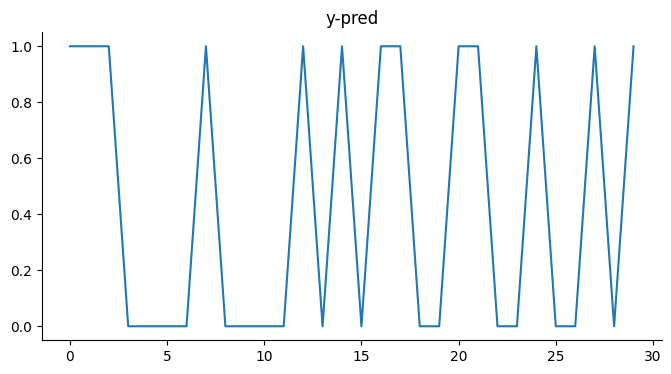

In [132]:
# @title y-pred

from matplotlib import pyplot as plt
ydata['y-pred'].plot(kind='line', figsize=(8, 4), title='y-pred')
plt.gca().spines[['top', 'right']].set_visible(False)

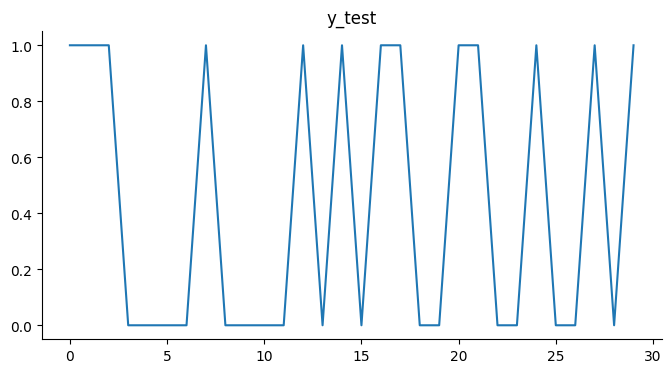

In [133]:
# @title y_test

from matplotlib import pyplot as plt
ydata['y_test'].plot(kind='line', figsize=(8, 4), title='y_test')
plt.gca().spines[['top', 'right']].set_visible(False)

In [134]:
ydata.to_excel('dataactualpred.xlsx', index=False)